# Karate binary case

# Part 2 - measuring frequencies

# Advantage

In [1]:
GAMMA_LOWER_BOUND = 0.85
GAMMA_UPPER_BOUND = 1.6

In [2]:
import pandas as pd
from paths import csv_path, KARATE_PR_NAME


# Id for data storage purposes
ID = 3

a = pd.read_csv(
    csv_path(id=ID, problem_name=KARATE_PR_NAME, solver_name="adv")
)

In [4]:
K = 2

n_all = a.shape[0]

n_groups = a.groupby(a.matrix_res).ngroups
n_in_group = a.groupby(a.matrix_res).matrix_res.value_counts().iloc[0]

print(
    f"Run for {n_groups} resolution param values"+f"for each value run {n_in_group} times."
)

Run for 20 resolution param valuesfor each value run 10 times.


#### Group results by matrix resolution (gamma) input

In [5]:
import numpy as np


# Only res. samples with 2 communities
print("All samples produced 2 communities: ", np.all(a == a[a["k"] == K]))

a_scores = a.mod_score
a_matrix_res = a.matrix_res

# Group by matrix resolution
# Measure mean and max values 
# for each matrix res. input
a_by_res = a.groupby(a.matrix_res, group_keys=True).agg(
    {"mod_score": ["mean", "std", "max", "min"]}
)

# Decimals precision
score_prec = 4
idx_prec = 2
a_by_res = a_by_res.round(score_prec)
a_by_res.index = a_by_res.index.to_series().round(idx_prec)

print(f"{a.shape[0]} results entries")
print(f"{a_by_res.shape[0]} resolution value params")

All samples produced 2 communities:  True
200 results entries
20 resolution value params


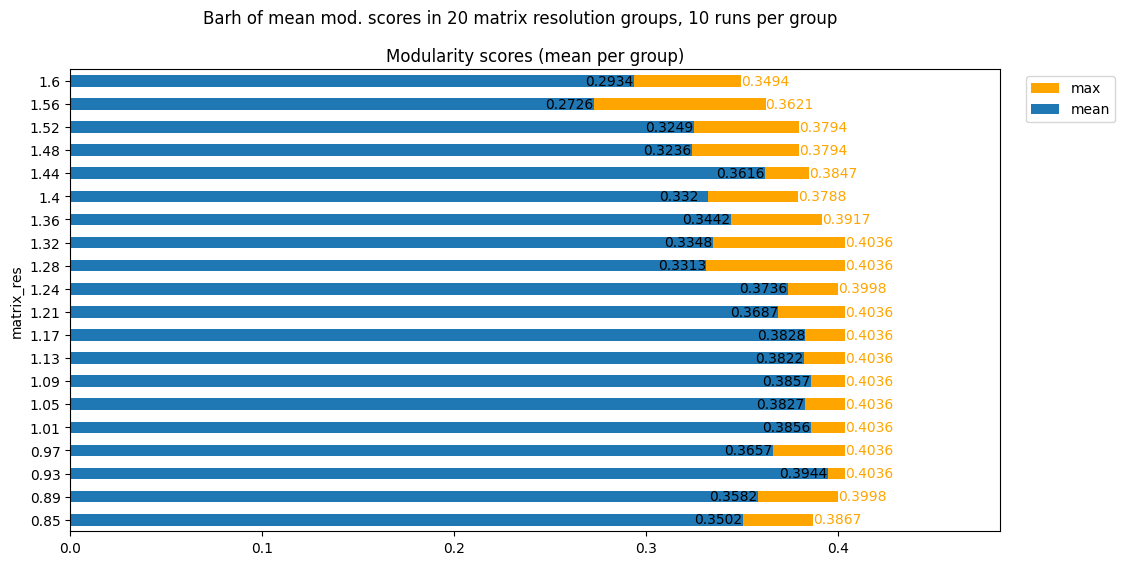

In [6]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle("Barh of mean mod. scores in "+f"{n_groups} matrix resolution groups, "+f"{n_in_group} runs per group")

a_max_barh = a_by_res.mod_score["max"].plot(ax=ax, kind="barh", color="orange")
ax.bar_label(ax.containers[-1], label_type="edge", color="orange")

a_mean_barh = a_by_res.mod_score["mean"].plot(ax=ax, kind="barh")
ax.bar_label(ax.containers[-1], label_type="edge", position=(-35,0), color="black")

ax.margins(x=0.2)
ax.set_title("Modularity scores (mean per group)")

ax.legend(
    bbox_to_anchor=(1.02, 1), loc=2
);